In [12]:
import os
import numpy as np
import scipy
import itk
import sys
import matplotlib.pyplot as plt
from __future__ import print_function
%matplotlib notebook
from mpl_toolkits import mplot3d
import cv2
import skimage
import skimage.io
from nd2reader import ND2Reader
import pims

In [2]:
file_list = sorted(os.listdir('./data'))
file_list = [file for file in file_list if file[0]!= '.']

In [9]:
rfp_file = './40x W2 L3-4 good.nd2'


In [10]:
images = ND2Reader(rfp_file)

In [44]:
print(images.metadata)

{'z_levels': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'pixel_microns': 0.17056709276229, 'total_images_per_channel': 31, 'width': 2048, 'num_frames': 1, 'frames': [0], 'experiment': {'description': 'ND Acquisition', 'loops': [{'duration': 0, 'stimulation': False, 'sampling_interval': 0.0, 'start': 0}]}, 'height': 2048, 'channels': ['C0NF-405', 'CONF-488', 'CONF-561', 'CONF-640'], 'fields_of_view': [0], 'date': datetime.datetime(2018, 3, 6, 17, 59, 41)}


In [46]:
images.sizes

{'c': 4, 't': 1, 'x': 2048, 'y': 2048, 'z': 31}

In [78]:
np_data = np.empty([31, 2048, 2048])

In [79]:
for i in range(31):
    np_data[i,:,:] = images[i]

<IPython.core.display.Javascript object>


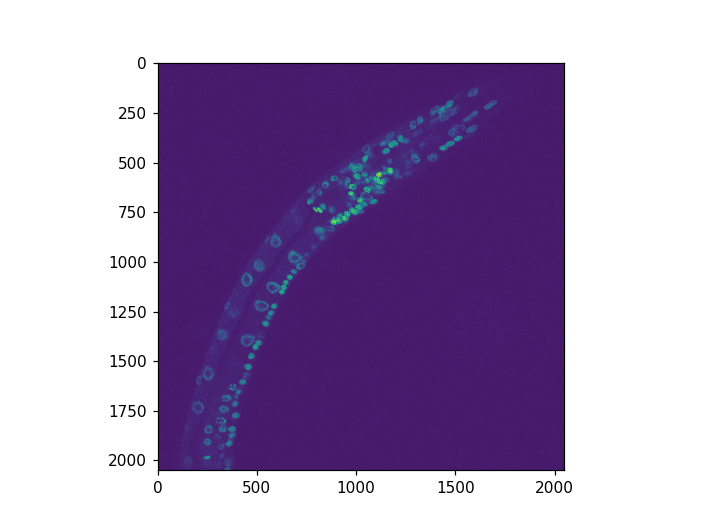

In [179]:
im = skimage.io.imread('./data/'+file_list[0])

In [181]:
im = im/im.max()

In [123]:

im[im < 0.25] = 0

In [124]:
from skimage.filters import gaussian

In [134]:
im_f = gaussian(im, sigma=2)
im_f[im_f < 0.3] = 0

In [135]:
im_mip = np.max(im_f, axis=1)

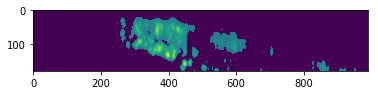

In [136]:
imgplot = plt.imshow(im_mip)

In [137]:
from skimage.feature import peak_local_max
from scipy import ndimage

In [183]:
cd = peak_local_max(im_f, min_distance=5)

In [184]:
mask = np.zeros_like(im_f)

In [185]:
for i in range(len(cd)):
    mask[tuple(cd[i])] = i 

In [186]:
from skimage.morphology import ball
from skimage.morphology import binary_dilation
struct = ball(5)
mask_d = binary_dilation(mask, struct)

In [187]:
mask = mask_d.astype(np.double)
segmentation, _ = ndimage.label(mask)
seg = segmentation.astype(np.double)

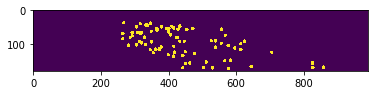

In [188]:
im_mip = np.max(mask_d, axis=1)
imgplot = plt.imshow(im_mip)

In [189]:
import neuroglancer
import h5py
import numpy as np
import sys

# 1. get data
# with h5py.File('../data/SNEMI3D/train-input'+suf+'.h5') as fid:
#    img = np.array(fid['main'])

neuroglancer.set_server_bind_address(bind_port=9991)

viewer=neuroglancer.Viewer()
voxel_size=[4,4,4]  # resolution
with viewer.txn() as s:
    s.voxel_size=voxel_size
    s.layers.append(
       name='im1',
       layer=neuroglancer.LocalVolume(
           data=im,
           voxel_size=voxel_size,
       ))
    s.layers.append(
       name='im2',
       layer=neuroglancer.LocalVolume(
           data=seg,
           voxel_size=voxel_size,
       ))

print(viewer)

http://127.0.0.1:9991/v/1d2e31470e083c0306568ff4d6c169edf9c75acc/
